In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data = pd.read_csv('Fish_dataset .csv')

In [5]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [6]:
pd.set_option('display.max_rows',500)

In [7]:
data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

# Plot a bar chart showing count of individual species?

<AxesSubplot:title={'center':'number of species'}>

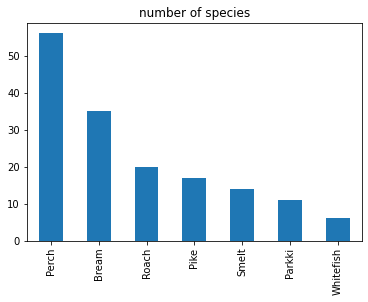

In [10]:
data.Species.value_counts().plot(kind='bar',title='number of species')

# Identify outliers and remove if any? 

In [11]:
a=data.iloc[:,1:].columns
a

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

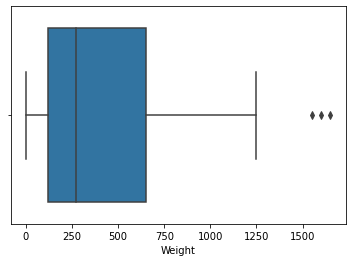

In [12]:
sns.boxplot(data['Weight'])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

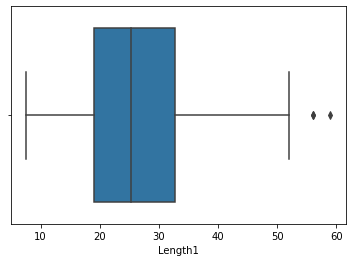

In [13]:
sns.boxplot(data['Length1'])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

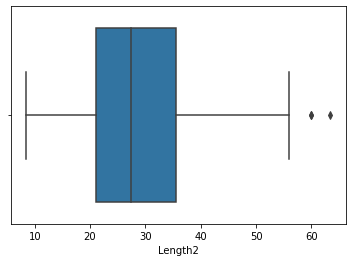

In [14]:
sns.boxplot(data['Length2'])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

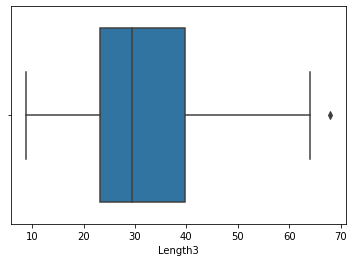

In [15]:
sns.boxplot(data['Length3'])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

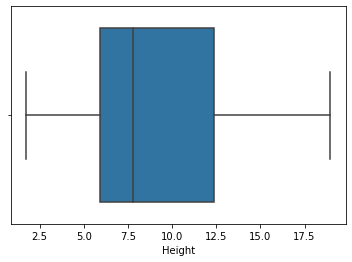

In [16]:
sns.boxplot(data['Height'])

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

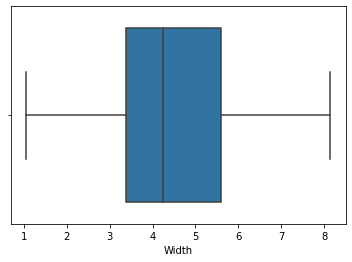

In [17]:
sns.boxplot(data['Width'])

In [18]:
for i in a:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = (q3-q1)
    pos_out = q3+(1.5*iqr)
    neg_out = q1-(1.5*iqr)
    print(pos_out,neg_out)

1445.0 -675.0
53.175000000000004 -1.4250000000000007
57.25 -0.75
64.40000000000002 -1.600000000000012
21.99755 -3.6868500000000006
8.882775 0.08737499999999976


In [19]:
data.loc[data['Weight']>1445]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [20]:
data = data.drop(index=[142,143,144])

In [21]:
data.loc[data['Length1']>53.17]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [22]:
data.loc[data['Length2']>57.25]

,Species,Weight,Length1,Length2,Length3,Height,Width


In [23]:
data.loc[data['Length3']>64.4]

,Species,Weight,Length1,Length2,Length3,Height,Width


### thus outliers were removed from the dataset

# encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

## checking normality of dependent variable using kdeplot

<AxesSubplot:xlabel='Weight', ylabel='Density'>

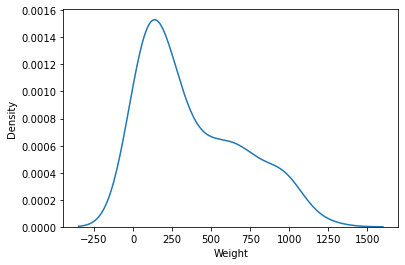

In [27]:
sns.kdeplot(data['Weight'])

### this graph explains that the dependent variable is not normally distributes.

## using shapiro test

In [28]:
from scipy.stats import shapiro

In [29]:
s,p = shapiro(data.Weight)
if p>0.05:
    print('significant',p)
else:
    print('not significant',p)

not significant 5.5507900498241725e-09


### we use shapiro test because sample is less  than 50 . Shapiro test also concluded that the dependent variable is not normally distributed

# checking correlation

<AxesSubplot:>

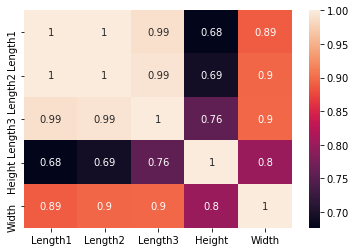

In [32]:
sns.heatmap(b.corr(),annot=True)

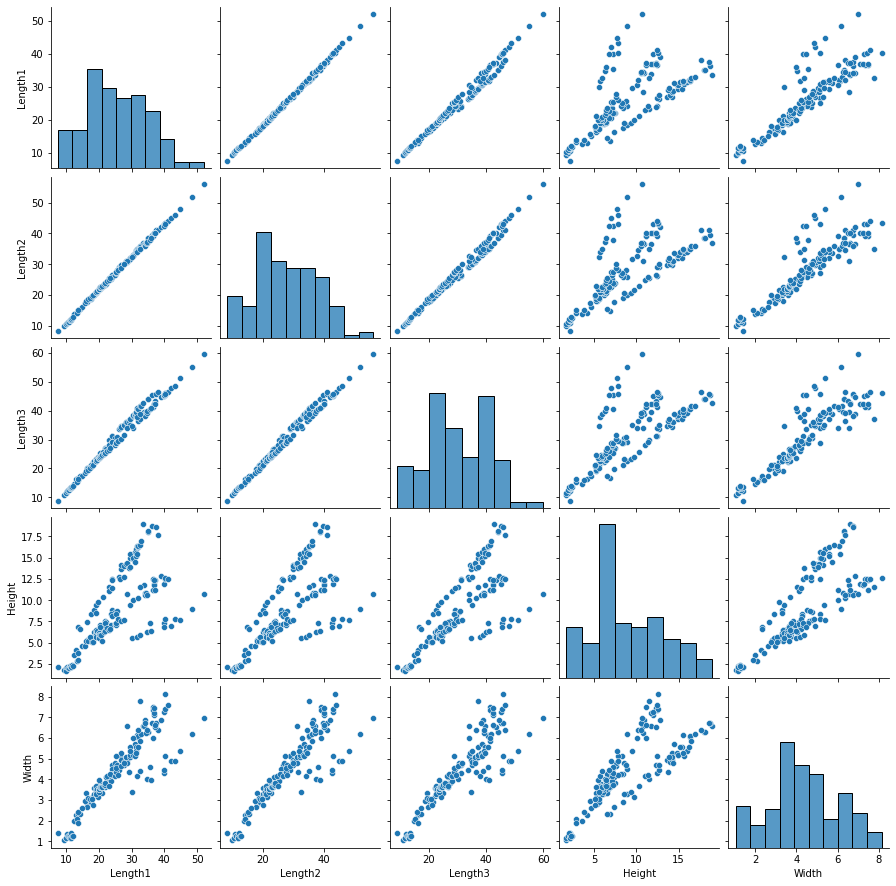

In [75]:
sns.pairplot(b)

### these graphs indicates that there is a relatively positive correlation between all independent variable 

## using pearsonr

In [33]:
from scipy.stats import pearsonr

In [34]:
for i in a:
    for j in a:
        r,p = pearsonr(data[i],data[j])
        if p < 0.05:
            print('significant',i,j)
        else:
            print('not significant',i,j)

significant Weight Weight
significant Weight Length1
significant Weight Length2
significant Weight Length3
significant Weight Height
significant Weight Width
significant Length1 Weight
significant Length1 Length1
significant Length1 Length2
significant Length1 Length3
significant Length1 Height
significant Length1 Width
significant Length2 Weight
significant Length2 Length1
significant Length2 Length2
significant Length2 Length3
significant Length2 Height
significant Length2 Width
significant Length3 Weight
significant Length3 Length1
significant Length3 Length2
significant Length3 Length3
significant Length3 Height
significant Length3 Width
significant Height Weight
significant Height Length1
significant Height Length2
significant Height Length3
significant Height Height
significant Height Width
significant Width Weight
significant Width Length1
significant Width Length2
significant Width Length3
significant Width Height
significant Width Width


### this pearson-r test also shows that there is positive correltion between each independent variable .Thus from this we also conclude there is multicolinearity 

## using vif

In [ ]:
b = data.iloc[:,2:]

In [35]:
for i in range(len(b.columns)):
    print(f'{b.columns[i]}---->{variance_inflation_factor(b.values,i)}')    

Length1---->11851.606958399318
Length2---->15437.668441672933
Length3---->3162.4841264495817
Height---->75.87834205065113
Width---->96.76421237834869


### this variance inflation technique shows that there is multicollinearity in every features.but very high valuees in length1 annd length2

# model building

In [139]:
x = data .drop(['Weight'],axis=1)
x

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
5,0,26.8,29.7,34.7,13.6024,4.9274
6,0,26.8,29.7,34.5,14.1795,5.2785
7,0,27.6,30.0,35.0,12.6700,4.6900
8,0,27.6,30.0,35.1,14.0049,4.8438
9,0,28.5,30.7,36.2,14.2266,4.9594


In [162]:
y = data['Weight']

In [113]:
x

,Species,Length3,Height,Width
0,0,30.0,11.5200,4.0200
1,0,31.2,12.4800,4.3056
2,0,31.1,12.3778,4.6961
3,0,33.5,12.7300,4.4555
4,0,34.0,12.4440,5.1340
5,0,34.7,13.6024,4.9274
6,0,34.5,14.1795,5.2785
7,0,35.0,12.6700,4.6900
8,0,35.1,14.0049,4.8438
9,0,36.2,14.2266,4.9594


In [163]:
from sklearn.model_selection import train_test_split


In [164]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [165]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [166]:
y_pred_test = model.predict(xtest)

In [167]:
y_pred_train = model.predict(xtrain)

In [168]:
model.score(xtest,ytest)

0.906821673503207

In [169]:
yintercept = '%.2f' % model.intercept_
Species = '%.2f Species' % model.coef_[0]
Length1= '%.4f Length1' % model.coef_[1]
Length2 = '%.4f Length2' % model.coef_[2]
Length3 = '%.2f Length3' % model.coef_[3]
Height = '%.2f Height' % model.coef_[3]
Width = '%.2f Width' % model.coef_[3]

In [170]:
y = print(yintercept+' + '+Species+' + '+Length1+' + '+Length2+' + '+Length3+' + '+Height+' + '+Width)

-549.01 + 14.37 Species + 13.6257 Length1 + 20.0696 Length2 + 75.17 Length3 + 75.17 Height + 75.17 Width


#  checking homoscadecity

<AxesSubplot:ylabel='Weight'>

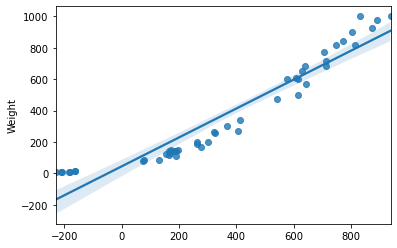

In [182]:
sns.regplot(x=y_pred_test,y=ytest)

### by this plot we conclude that dataset is homoscadecity

# What is the mean score of the model at 95% confidence interval?

In [171]:
from statsmodels.stats.weightstats import ztest


In [172]:
ztest(data['Weight'])

(14.665958345435117, 1.0650274731468029e-48)

### there is a 95% chances that true population lies between interval of [14.665 , 1.06 e-48)

# Compare real and predicted weights and give a conclusion statement based on it?


In [180]:
f_comp = pd.DataFrame({'Actual': ytest, 'predicted': y_pred_test})
f_comp

,Actual,predicted
80,85.0,78.175898
126,1000.0,937.434853
137,500.0,614.966111
118,820.0,813.223952
10,475.0,543.320002
94,150.0,170.416943
153,9.8,-183.096913
90,110.0,190.630111
53,272.0,407.142124
154,12.2,-164.228062


## residual

In [174]:
Res = y_pred_test - ytest
Res

80      -6.824102
126    -62.565147
137    114.966111
118     -6.776048
10      68.320002
94      20.416943
153   -192.896913
90      80.630111
53     135.142124
154   -176.428062
15      16.297341
14     -24.167845
84      30.798131
78      -4.341217
146   -214.827650
71      66.048332
66      26.397516
104     56.817597
145   -236.694959
93      36.375075
138     76.335311
88      37.091178
120    -96.726669
18      -2.891354
68      46.036712
98      75.198217
69      61.779210
32     -52.028926
33     -84.155081
112     26.407999
48     105.981695
128     99.694734
27      -1.136175
122    -73.394174
21     -46.056212
92      45.033325
148   -189.181839
155   -177.453444
139    -63.625166
147   -218.726014
38      42.607070
29    -168.050433
103     64.137647
19     -21.520199
42      44.950399
2       73.496348
111    -66.804461
Name: Weight, dtype: float64

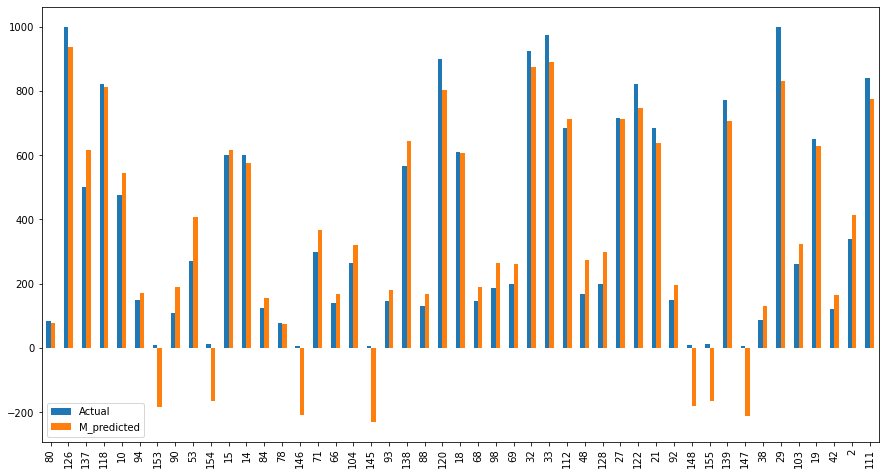

In [175]:
f_comp.plot(kind='bar', figsize=(15, 8))
plt.show()

### this graph explains that there is a minimal difference between actual and predicted  values

In [176]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,y_pred_test)
mse

9873.448337509853

In [177]:
rmse = np.sqrt(mse)
rmse

99.36522700376553

### this rmse score shows that the difference between the absolute and predicted is small .So this fit is good

In [178]:
from sklearn.metrics import r2_score

In [179]:
r2_test=r2_score(ytest,y_pred_test)
r2_train=r2_score(ytrain,y_pred_train)
r2_test,r2_train

(0.906821673503207, 0.8959101484066491)

### this r2_value shows that variance of depend variable is well explained by the independent variable and both train and test performed well

In [158]:
x= x.drop('Length1',axis=1)

KeyError: "['Length1'] not found in axis"

### dropped length1 feature because it has high vif and it will lead to a better accuracy and lower rmse value 

In [159]:
for i in range(len(x.columns)):
    print(f'{x.columns[i]}---->{variance_inflation_factor(x.values,i)}')    

Species---->2.9553626150513432
Length2---->3465.869825485631
Length3---->3640.17549949535
Height---->98.01341313942721
Width---->110.48581566827508


In [115]:
x = x.drop('Length2',axis=1)

KeyError: "['Length2'] not found in axis"

### even though feature length2 higher vif values dropping it will decrease r2 _score and increase rmsc value so by cosideing it as significant we just keep it

In [160]:
x = x.drop('Length3',axis=1)

In [161]:
x

,Species,Length2,Height,Width
0,0,25.4,11.5200,4.0200
1,0,26.3,12.4800,4.3056
2,0,26.5,12.3778,4.6961
3,0,29.0,12.7300,4.4555
4,0,29.0,12.4440,5.1340
5,0,29.7,13.6024,4.9274
6,0,29.7,14.1795,5.2785
7,0,30.0,12.6700,4.6900
8,0,30.0,14.0049,4.8438
9,0,30.7,14.2266,4.9594


### dropped length3 feature because it has high vif and it will also lead to a better accuracy and lower rmse value 

In [183]:
for i in range(len(x.columns)):
    print(f'{x.columns[i]}---->{variance_inflation_factor(x.values,i)}')   

Species---->2.567342710373719
Length2---->44.03434275141858
Height---->19.89082751691336
Width---->59.84322121649717
